In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.neighbors import KNeighborsClassifier

In [2]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [3]:
df = pd.read_csv("C:\\program1\\class\\abalone\\abalone.data", header=None)
df.columns = ['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,F,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,M,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,M,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,F,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


In [4]:
# 결측치 확인
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

In [5]:
# 결측치 제거
df = df.dropna()
df.isnull().sum()

Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Shucked weight    0
Viscera weight    0
Shell weight      0
Rings             0
dtype: int64

Text(0.5, 1.0, 'Rings of abalone')

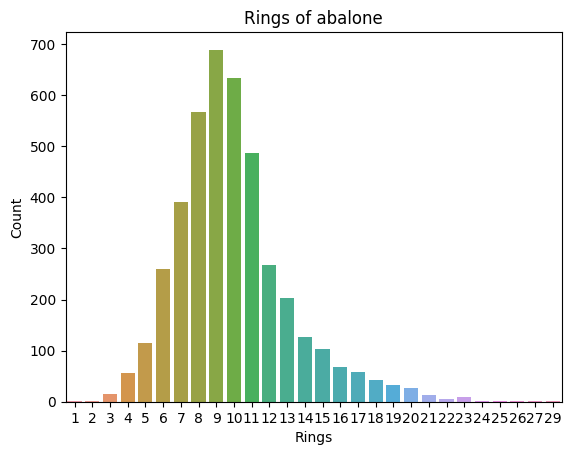

In [6]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="Rings")
plt.xlabel("Rings")
plt.ylabel("Count")
plt.title("Rings of abalone")

Text(0.5, 1.0, 'Sex of abalone')

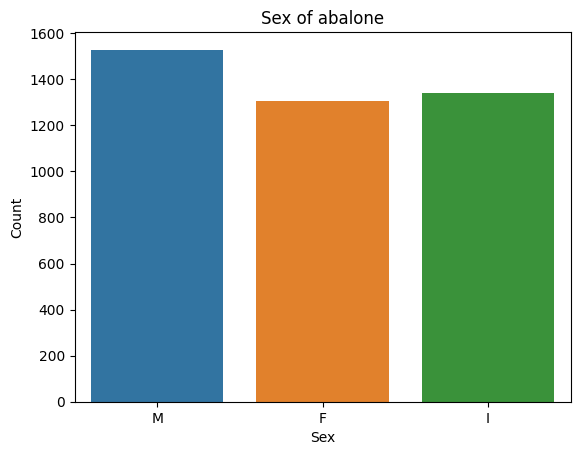

In [7]:
# 레이블 갯수 확인 (그래프)
sns.countplot(data = df, x="Sex")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.title("Sex of abalone")

In [8]:
# 레이블 갯수 확인 (숫자)
df['Rings'].value_counts()

9     689
10    634
8     568
11    487
7     391
12    267
6     259
13    203
14    126
5     115
15    103
16     67
17     58
4      57
18     42
19     32
20     26
3      15
21     14
23      9
22      6
27      2
24      2
1       1
26      1
29      1
2       1
25      1
Name: Rings, dtype: int64

In [9]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [10]:
#레이블을 숫자로 변환
from sklearn.preprocessing import StandardScaler, LabelEncoder

# LabelEncoder 객체 생성
label = LabelEncoder()

# 문자로 지정된 열의 데이터에 대해 LabelEncoder를 적용하여 변환
df['Sex'] = label.fit_transform(df['Sex'])

df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,15
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,9
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,10
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,7
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,11
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,10
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,9
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,10


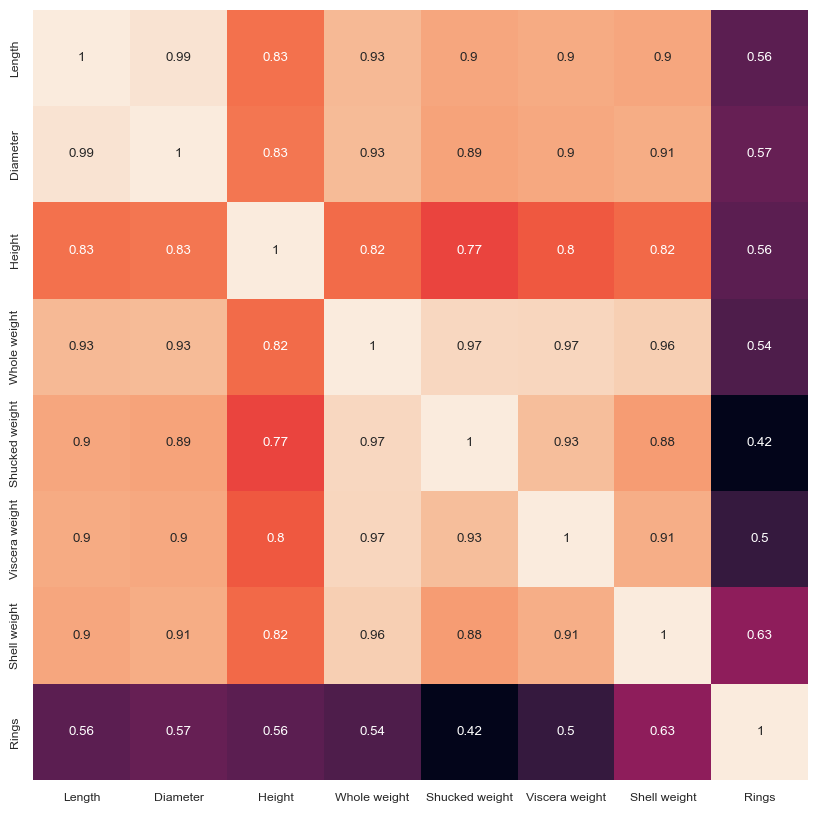

In [11]:
df_corr = df[[ 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight', 'Rings']]

#상관 관계 행렬
# 0.3 이상인 경우 상관관계가 있고, 0.7이상이면 아주 높음

df_corr=df_corr.corr()

#히트맵
plt.figure(figsize=(10,10))
sns.set(font_scale=0.8)
sns.heatmap(df_corr, annot=True, cbar=False)
plt.show()

In [12]:
# Convert RingCount to Age by adding 1.5, accoring to codebook
df['Age'] = df['Rings'] + 1.5
df.drop('Rings', axis=1, inplace=True)

In [13]:
X=df.drop('Sex', axis=1)

X.head()
# head()는 첫 5행만 출력함.

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


In [14]:
y=df['Sex']
y.value_counts()

2    1528
1    1342
0    1307
Name: Sex, dtype: int64

In [15]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
# random_state는 데이터를 무작위로 나누거나 섞을 때 사용되는 난수 발생기의 시드(seed) 값

scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

X_train

,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,-0.553972,-0.655933,-0.821100,-0.792792,-0.752632,-0.801600,-0.825276,-0.921055
1,0.872732,0.564402,0.231527,0.388113,0.784560,0.054099,-0.469265,-0.610232
2,0.914694,1.072875,0.582403,0.800817,0.642561,1.056228,0.807342,0.011413
3,-1.435172,-1.469490,-1.288935,-1.299477,-1.325134,-1.181402,-1.235229,-0.610232
4,1.502161,1.479653,1.284155,1.870374,1.566679,2.191058,1.976066,0.633058
...,...,...,...,...,...,...,...,...
3127,1.040580,1.174569,1.050238,1.603751,1.359316,1.285024,1.695572,0.011413
3128,1.082542,0.920333,-0.002390,0.681297,0.800337,1.239265,0.314680,0.633058
3129,0.578999,0.411860,0.114569,0.249183,0.450976,0.223408,0.088127,0.011413
3130,0.830770,0.818638,0.582403,0.592422,0.514086,0.497964,0.555617,-0.299410


In [16]:
X_train.columns

Index(['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Age'],
      dtype='object')

In [17]:
y_train

940     1
2688    2
1948    2
713     2
3743    0
       ..
1033    2
3264    0
1653    2
2607    0
2732    1
Name: Sex, Length: 3132, dtype: int32

In [18]:
from sklearn.svm import SVC

clf_svm = SVC(random_state=0)
clf_svm.fit(X_train, y_train)

pred_svm = clf_svm.predict(X_test)

print("\n--- SVM Classifier ---")
print('{:.5f}'.format(accuracy_score(y_test, pred_svm)))
print(confusion_matrix(y_test, pred_svm))
print(classification_report(y_test,pred_svm))


--- SVM Classifier ---
0.56172
[[ 69  46 201]
 [ 12 287  60]
 [ 60  79 231]]
              precision    recall  f1-score   support

           0       0.49      0.22      0.30       316
           1       0.70      0.80      0.74       359
           2       0.47      0.62      0.54       370

    accuracy                           0.56      1045
   macro avg       0.55      0.55      0.53      1045
weighted avg       0.55      0.56      0.54      1045



In [19]:
# Build a decision tree classifier and predict

clf_dt = DecisionTreeClassifier(random_state=0)
clf_dt.fit(X_train, y_train)

pred_dt = clf_dt.predict(X_test)

print ("\n--- Decision Tree Classifier ---")
print ('{:.5f}'.format(accuracy_score(y_test, pred_dt)))
print (confusion_matrix(y_test, pred_dt))
print(classification_report(y_test,pred_dt))


--- Decision Tree Classifier ---
0.47656
[[120  56 140]
 [ 61 220  78]
 [151  61 158]]
              precision    recall  f1-score   support

           0       0.36      0.38      0.37       316
           1       0.65      0.61      0.63       359
           2       0.42      0.43      0.42       370

    accuracy                           0.48      1045
   macro avg       0.48      0.47      0.48      1045
weighted avg       0.48      0.48      0.48      1045



In [20]:
clf_nn = MLPClassifier(random_state=0)
clf_nn.fit(X_train, y_train)

pred_nn = clf_nn.predict(X_test)

print ("\n--- Neural Network Classifier ---")
print ('{:.5f}'.format(accuracy_score(y_test, pred_nn)))
print (confusion_matrix(y_test, pred_nn))
print(classification_report(y_test,pred_nn))


--- Neural Network Classifier ---
0.57225
[[123  38 155]
 [ 32 279  48]
 [110  64 196]]
              precision    recall  f1-score   support

           0       0.46      0.39      0.42       316
           1       0.73      0.78      0.75       359
           2       0.49      0.53      0.51       370

    accuracy                           0.57      1045
   macro avg       0.56      0.57      0.56      1045
weighted avg       0.57      0.57      0.57      1045



C:\Users\User\.anaconda\envs\deep\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


In [21]:
df

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,2,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.1500,16.5
1,2,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.0700,8.5
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.2100,10.5
3,2,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.1550,11.5
4,1,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.0550,8.5
...,...,...,...,...,...,...,...,...,...
4172,0,0.565,0.450,0.165,0.8870,0.3700,0.2390,0.2490,12.5
4173,2,0.590,0.440,0.135,0.9660,0.4390,0.2145,0.2605,11.5
4174,2,0.600,0.475,0.205,1.1760,0.5255,0.2875,0.3080,10.5
4175,0,0.625,0.485,0.150,1.0945,0.5310,0.2610,0.2960,11.5


In [22]:
X=df.drop('Length', axis=1)

X.head()
# head()는 첫 5행만 출력함

,Sex,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
0,2,0.365,0.095,0.5140,0.2245,0.1010,0.150,16.5
1,2,0.265,0.090,0.2255,0.0995,0.0485,0.070,8.5
2,0,0.420,0.135,0.6770,0.2565,0.1415,0.210,10.5
3,2,0.365,0.125,0.5160,0.2155,0.1140,0.155,11.5
4,1,0.255,0.080,0.2050,0.0895,0.0395,0.055,8.5


In [23]:
y=df['Length']
y

0       0.455
1       0.350
2       0.530
3       0.440
4       0.330
        ...  
4172    0.565
4173    0.590
4174    0.600
4175    0.625
4176    0.710
Name: Length, Length: 4177, dtype: float64

In [24]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)
# random_state는 데이터를 무작위로 나누거나 섞을 때 사용되는 난수 발생기의 시드(seed) 값

X_train

,Sex,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Age
940,1,0.345,0.105,0.4490,0.1960,0.0945,0.1265,8.5
2688,2,0.465,0.150,1.0270,0.5370,0.1880,0.1760,9.5
1948,2,0.515,0.165,1.2290,0.5055,0.2975,0.3535,11.5
713,2,0.265,0.085,0.2010,0.0690,0.0530,0.0695,9.5
3743,0,0.555,0.195,1.7525,0.7105,0.4215,0.5160,13.5
...,...,...,...,...,...,...,...,...
1033,2,0.525,0.185,1.6220,0.6645,0.3225,0.4770,11.5
3264,0,0.500,0.140,1.1705,0.5405,0.3175,0.2850,13.5
1653,2,0.450,0.145,0.9590,0.4630,0.2065,0.2535,11.5
2607,0,0.490,0.165,1.1270,0.4770,0.2365,0.3185,10.5


In [25]:
# Scale X
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=X.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X.columns)

In [26]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()
model.fit(X_train, y_train)

print('모델점수', model.score(X_test, y_test))

from sklearn.metrics import mean_squared_error

ly_preds = model.predict(X_test)
mse = np.sqrt(mean_squared_error(ly_preds, y_test))
print('평균제곱근오차', mse)

모델점수 0.9774722017577516
평균제곱근오차 0.018401988095522324
